<a href="https://colab.research.google.com/github/Rafiryd/churn/blob/rafiryd/Salinan_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Implementasi Linear Regression

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

## Simple Linear Regression

### Membuat dataset

In [2]:
df_simple = pd.read_csv('/content/Salinan advertising (2).csv',usecols=['TV','Sales'])

In [3]:
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


AttributeError: ignored

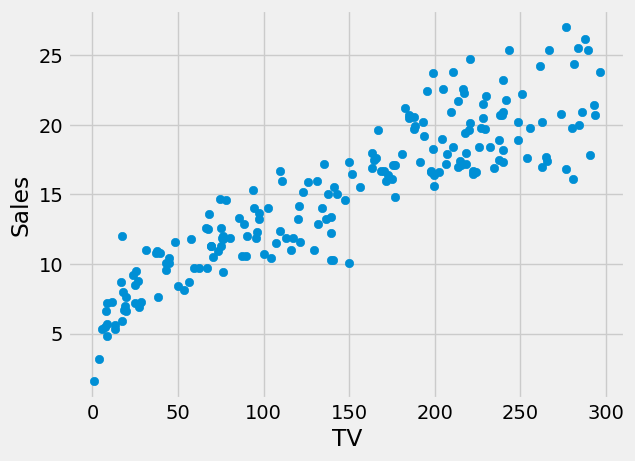

In [9]:
scatter_plot(df_simple)

In [10]:
def bar_plot(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in num_cols:
        if col != 'Sales':
            plt.bar(df[col], df['Sales'])
            plt.xlabel(col)
            plt.ylabel('Sales')
            plt.title(f'Scatter Plot: {col} vs. Sales')
            plt.show()

In [14]:
def scatter_plot(df):
  num_cols = df.select_dtypes(include=['int64','float64']).columns

  for col in num_cols:
    if col != 'Sales':
      plt.scatter(df[col], df['Sales'])
      plt.xlabel(col)
      plt.ylabel('Sales')
      plt.tittle(f'bar plot : {col} vs. Sales')
      plt.show()

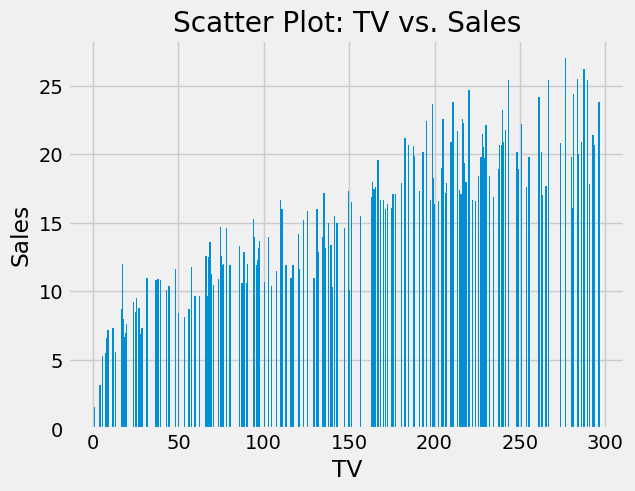

In [15]:
bar_plot(df_simple)

In [ ]:
)df_simple.describe()

In [ ]:
df_simple.isnull().sum()

In [ ]:
lr = LinearRegression()

In [ ]:
X = df_simple[["TV"]]
y = df_simple["Sales"]

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Sales vs TV spending ")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

### R Squared Score

In [ ]:
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")

#### *Simple Linear Regression Formula* : **y = b0 + b1 * x1**

model regression linear sebenarnya merupakan rumus linear dalam bentuk y = b0 + b1*x1; dimana y merupakan keluaran atau outcome, dan x1 merupakan variable independen (predictor), juga b1 adalah kemiringan garis; juga dikenal sebagai koefisien regresi dan b0 adalah intersep yang diberi label konstan.

#### Finding Intercept and Coefficient

In [ ]:
lr.intercept_

In [ ]:
lr.coef_[0]

- Let's find out sales number if we spend **300 $** on TV advertising

**by using our Simple Linear Regression**

In [ ]:
print("Predicted Sales :",round(lr.predict([[300]])[0],2))

**by using ıntercept and coefficient**

Recall the equation is y = b_0 + b_1 * x1

Let's put each value into the equationm

In [ ]:
y = lr.intercept_ + lr.coef_* 300

In [ ]:
print("Predicted Sales :",round(y[0],2))

- We see the same value as you can see above . Linear regression does the same job for each observation.

## Multiple Linear Regression

In [ ]:
df_multiple = pd.read_csv('advertising.csv')

In [ ]:
df_multiple.head()

In [ ]:
df_multiple.describe()

### Missing values

In [ ]:
df_multiple.isnull().sum()

In [ ]:
X = df_multiple[["TV","Radio","Newspaper"]]
y = df_multiple["Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

### Interpretasi Hasil dengan Adjusted R Squared

- Kita sudah tahu bagaimana R Squared dapat membantu kita dalam Evaluasi Model. Namun, ada satu kelemahan utama menggunakan R Squared. Nilai R Squared tidak pernah berkurang. Jika Anda bertanya-tanya mengapa perlu dikurangi karena hanya akan menghasilkan model yang buruk, menambahkan variabel independen baru akan menghasilkan peningkatan nilai R Squared. Ini adalah aliran utama karena R Squared akan menyarankan bahwa menambahkan variabel baru terlepas dari apakah mereka benar-benar signifikan atau tidak, akan meningkatkan nilainya.

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r_squared = r2_score(y_test,y_pred)

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))

#### *Rumus Multiple Linear Regression* : **y = b0 + b1 * x1  + b2 * x2  + b3 * x3**

In [ ]:
print("Intercept is ",lr.intercept_,"and Coefficients are", lr.coef_)

In [ ]:
lr.coef_

- Koefisien TV : **0.05444578**
- Koefisien Radio : **0.10700123**
- Koefisien Newspaper : **0.00033566**

#### Coba kita cari tahu berapa unit penjualan yang bsa kita peroleh dari pengeluaran dibawah ini
- 200 Dollars untuk Periklanan TV
- 50  Dollars untuk Radio
- 20  Dollars untuk Newspaper

**Menggunakan Linear Regression kita**

In [ ]:
round(lr.predict([[200,50,20]])[0],2)

**Menggunakan coefficient dan intercept LR**

In [ ]:
y = lr.intercept_ + lr.coef_[0] * 200 + lr.coef_[1] * 50 + lr.coef_[2] * 20

In [ ]:
round(y,2)

#Linear Regression from scratch

In [ ]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Linear Regression

class LinearRegression() :

	def __init__( self, learning_rate, iterations ) :

		self.learning_rate = learning_rate

		self.iterations = iterations

	# Function for model training

	def fit( self, X, Y ) :

		# no_of_training_examples, no_of_features

		self.m, self.n = X.shape

		# weight initialization

		self.W = np.zeros( self.n )

		self.b = 0

		self.X = X

		self.Y = Y


		# gradient descent learning

		for i in range( self.iterations ) :

			self.update_weights()

		return self

	# Helper function to update weights in gradient descent

	def update_weights( self ) :

		Y_pred = self.predict( self.X )

		# calculate gradients

		dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) / self.m

		db = - 2 * np.sum( self.Y - Y_pred ) / self.m

		# update weights

		self.W = self.W - self.learning_rate * dW

		self.b = self.b - self.learning_rate * db

		return self

	# Hypothetical function h( x )

	def predict( self, X ) :

		return X.dot( self.W ) + self.b

# Thank you ###